In [0]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import matplotlib.image as im
from google.colab import files
image=files.upload()
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.optimizers import SGD
from keras.datasets import mnist

Saving image2.jpg to image2 (1).jpg


Préparation des données.

(28, 28)
60000


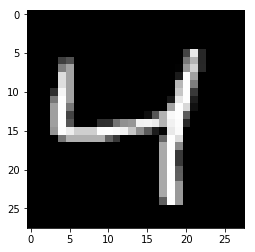

In [0]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train[2].shape)
plt.imshow(X_train[2],cmap=plt.cm.gray)
print(len(X_train))

In [0]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test  = X_test.reshape(X_test.shape[0], 784)
print(X_train)
print(len(X_train))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
60000


"Normalisation" de la base de données pour que la valeur de chaque pixel soit comprise entre 1 et -1.

In [0]:
X_train =(X_train.astype('float32')-127.5)/127.5
X_test  = (X_test.astype('float32')-127.5)/127.5
print(X_train)

[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


Traîter les labels Y de la base de données.

Exemple:
$Y_{voulu}$=[0,5,6,1,3,5,6] devient 
\begin{pmatrix} 1&0&0&0&0&0&0&0&0&0 \\ 0&0&0&0&0&1&0&0&0&0 \\ 0&0&0&0&0&0&1&0&0&0 \\  0&1&0&0&0&0&0&0&0&0& \\ 0&0&0&1&0&0&0&0&0&0 \\ 0&0&0&0&0&1&0&0&0&0 \\ 0&0&0&0&0&0&1&0&0&0 \end{pmatrix} 

Le nombre de lignes correspond au nombre de donnée, ici 7, et les colonnes correspondent aux $Y_{voulu}$ possibles, donc ici [0,1,2,3,4,5,6,7,8,9].

In [0]:
def to_categorical(y,nombre_classes):
  
  n = y.shape[0]
  categorical = np.zeros((n,nombre_classes))
  for i in range(n):
    categorical[i][y[i]] = 1
  return categorical

Y_train_OHE = to_categorical(Y_train,10)
Y_test_OHE = to_categorical(Y_test,10)
print(Y_train[2])
print(Y_train_OHE[2])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


On peut faire varier les paramètres.

In [0]:
dimension_entree=784
nbneuronnes1=250
nbneuronnes2=128
nbneuronnes3=10
epoch=50
batchsize=250
taux_apprentissage=0.01

Construction du réseau de neurones.

In [0]:
model=Sequential()
model.add(Dense(nbneuronnes1, input_shape=(dimension_entree,)))  
model.add(Activation('sigmoid'))
model.add(Dense(nbneuronnes2))
model.add(Activation('sigmoid'))
model.add(Dense(nbneuronnes3))
model.add(Activation('softmax'))

model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 250)               196250    
_________________________________________________________________
activation_1 (Activation)    (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32128     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 229,668
Trainable params: 229,668
Non-trainable params: 0
_____________________________________________

Construit ce réseau de neurones.
![Texte alternatif…](https://drive.google.com/uc?id=14zkBZKSemHZaGcNgbPNUhWwpNDSyMgM2)

In [0]:
modelExemple=Sequential()

modelExemple.add(Dense(6, input_shape=(3,)))  
modelExemple.add(Activation('sigmoid'))
modelExemple.add(Dense(5))
modelExemple.add(Activation('softmax'))

modelExemple.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 24        
_________________________________________________________________
activation_4 (Activation)    (None, 6)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 35        
_________________________________________________________________
activation_5 (Activation)    (None, 5)                 0         
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


Paramétrage de l'entraînement.

In [0]:
sgd=SGD(lr=taux_apprentissage)

model.compile(
    loss='categorical_crossentropy', 
    optimizer='sgd', 
    metrics=['accuracy']  
)

Entraînement du réseau de neurones.

In [0]:
hist_train=model.fit(
    X_train, 
    Y_train_OHE,
    batch_size=batchsize,
    epochs=epoch,
    validation_data=(X_test, Y_test_OHE),
    verbose=2
) 


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/50





 - 3s - loss: 2.2683 - acc: 0.2183 - val_loss: 2.2072 - val_acc: 0.2793
Epoch 2/50
 - 2s - loss: 2.1562 - acc: 0.4815 - val_loss: 2.0934 - val_acc: 0.5721
Epoch 3/50
 - 2s - loss: 2.0320 - acc: 0.6027 - val_loss: 1.9516 - val_acc: 0.6360
Epoch 4/50
 - 2s - loss: 1.8776 - acc: 0.6598 - val_loss: 1.7795 - val_acc: 0.6944
Epoch 5/50
 - 2s - loss: 1.6991 - acc: 0.6947 - val_loss: 1.5920 - val_acc: 0.7334
Epoch 6/50
 - 2s - loss: 1.5153 - acc: 0.7264 - val_loss: 1.4106 - val_acc: 0.7554
Epoch 7/50
 - 2s - loss: 1.3450 - acc: 0.7505 - val_loss: 1.2508 - val_acc: 0.7777
Epoch 8/50
 - 2s - loss: 1.1981 - acc: 0.7735 - val_loss: 1.1164 - val_acc: 0.7906
Epoch 9/50
 - 2s - loss: 1.0761 - acc: 0.7905 - val_loss: 1.0061 - val_acc: 0.8026
Epoch 10/50
 - 2s - loss: 0.9761 - acc: 0.8039 - val_loss: 0.9160 - val_acc: 0.8188
Epoch 11/50
 - 2s

Test du réseau de neurones artificiels.

In [0]:
loss_and_metrics=model.evaluate(X_test, Y_test_OHE, batch_size=128)



10000/10000 [==============================] - 0s 19us/step


Programme principal.

Erreur de la base de données TEST 0.3300635834932327
Taux de reconnaisance 0.906


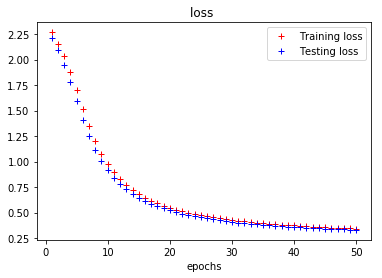

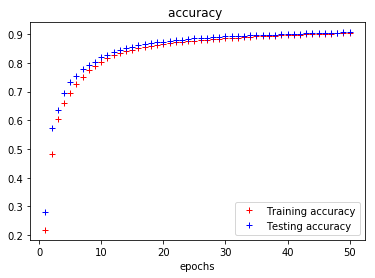

[[0.03082166 0.02587976 0.4922026  0.04656197 0.01161192 0.07934945
  0.2025489  0.09113829 0.00475975 0.01512577]]
On prévoit un 2


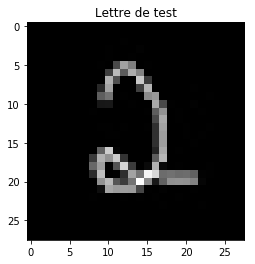

In [0]:
epochs=range(1,epoch+1)

loss_train=hist_train.history["loss"]
metrics_train=hist_train.history["acc"]

loss_test=hist_train.history["val_loss"]
metrics_test=hist_train.history["val_acc"]


print('Erreur de la base de données TEST',loss_and_metrics[0])
print('Taux de reconnaisance',loss_and_metrics[1])
plt.figure()
plt.title("loss ")
plt.plot(epochs,loss_train,'r+',label="Training loss")
plt.plot(epochs,loss_test,'b+',label="Testing loss")
plt.legend()
plt.xlabel("epochs")
plt.show()

plt.figure()
plt.title("accuracy ")
plt.plot(epochs,metrics_train,'r+',label="Training accuracy")
plt.plot(epochs,metrics_test,'b+',label="Testing accuracy")
plt.legend()
plt.xlabel("epochs")
plt.show()



L=im.imread("image2.jpg")
plt.imshow(L,cmap=plt.cm.gray)
L=np.array([L])
plt.title("Lettre de test")
L=L.reshape(1,784)
L =(L.astype('float32')-127.5)/127.5
Resultat=model.predict_classes(L)
Probabilite=model.predict(L)
print(Probabilite)
print('On prévoit un',str(Resultat[0]))

Mettre en évidence l'overfitting en réduisant la base de données à 100 éléments, en diminuant la taille des batchs, en augmentant le nombre d'epoch et en augmentant le taux d'apprentissage.

In [0]:
dimension_entree=784
nbneuronnes1=512
nbneuronnes2=256
nbneuronnes3=10
epoch=200
batch=1
taux_apprentissage=0.05

In [0]:

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)
X_test  = X_test.reshape(X_test.shape[0], 784)
X_train =(X_train.astype('float32')-127.5)/127.5
X_test  = (X_test.astype('float32')-127.5)/127.5

# On crée une base de données de 100 éléments avec le même nombre d'éléments dans chaque classe. 
new_count = 100
new_train_x = np.zeros((new_count,784))
new_train_y = np.zeros((new_count,))
for i in range(10):
  counter = 0
  pointer = 0
  while counter != (new_count//10):
    if Y_train[pointer]==i:
      new_train_x[i*new_count//10+counter,:] = X_train[pointer]
      new_train_y[i*new_count//10+counter] = Y_train[pointer]
      counter += 1
    pointer += 1
X_train = new_train_x
Y_train = new_train_y.astype('int32')
shuf = np.arange(new_count)
np.random.shuffle(shuf)
X_train[:] = X_train[shuf,:]
Y_train[:] = Y_train[shuf]

Y_train_OHE = to_categorical(Y_train,10)
Y_test_OHE = to_categorical(Y_test,10)

model=[]
model=Sequential()
model.add(Dense(nbneuronnes1, input_shape=(dimension_entree,)))  
model.add(Activation('sigmoid'))
model.add(Dense(nbneuronnes2))
model.add(Activation('sigmoid'))
model.add(Dense(nbneuronnes3))
model.add(Activation('softmax'))

sgd=SGD(lr=taux_apprentissage)

model.compile(
    loss='categorical_crossentropy', 
    optimizer=sgd, 
    metrics=['accuracy']  
)


In [0]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []
for i in range(epoch):
# On entraîne le réseau de neurones avec une taille de batch égale à 1 et on le teste avec une taille de batch égale à 128.
  hist_train_loss = []
  hist_train_acc = []
  for j in range(X_train.shape[0]):
    hist=model.train_on_batch(X_train[[j],:],Y_train_OHE[[j],:])
    hist_train_loss.append(hist[0])
    hist_train_acc.append(hist[1])
  train_loss.append(sum(hist_train_loss)/len(hist_train_loss))
  train_acc.append(sum(hist_train_acc)/len(hist_train_acc))
  test_hist = model.evaluate(X_test, Y_test_OHE,batch_size=128,verbose=0)
  test_loss.append(test_hist[0])
  test_acc.append(test_hist[1])
  print("Epoch "+str(i+1)+"/"+str(epoch)+"\tLoss: "+str(train_loss[-1])[:6]+"\tAcc: "+str(train_acc[-1])+"\tval_Loss: "+str(test_loss[-1])[:6]+"\tval_Acc: "+str(test_acc[-1])[:6])

Epoch 1/200	Loss: 2.9210	Acc: 0.11	val_Loss: 2.5151	val_Acc: 0.1011
Epoch 2/200	Loss: 2.4432	Acc: 0.16	val_Loss: 2.9729	val_Acc: 0.101
Epoch 3/200	Loss: 3.3467	Acc: 0.11	val_Loss: 3.1087	val_Acc: 0.1034
Epoch 4/200	Loss: 3.5785	Acc: 0.18	val_Loss: 5.9384	val_Acc: 0.1014
Epoch 5/200	Loss: 2.1867	Acc: 0.34	val_Loss: 1.9430	val_Acc: 0.337
Epoch 6/200	Loss: 1.0457	Acc: 0.65	val_Loss: 1.5212	val_Acc: 0.4765
Epoch 7/200	Loss: 0.7278	Acc: 0.72	val_Loss: 1.3695	val_Acc: 0.5062
Epoch 8/200	Loss: 0.5381	Acc: 0.8	val_Loss: 1.4348	val_Acc: 0.5128
Epoch 9/200	Loss: 0.4092	Acc: 0.82	val_Loss: 1.4939	val_Acc: 0.5083
Epoch 10/200	Loss: 0.3044	Acc: 0.88	val_Loss: 1.4832	val_Acc: 0.5192
Epoch 11/200	Loss: 0.2178	Acc: 0.96	val_Loss: 1.4439	val_Acc: 0.5363
Epoch 12/200	Loss: 0.1626	Acc: 0.98	val_Loss: 1.3849	val_Acc: 0.5583
Epoch 13/200	Loss: 0.1284	Acc: 0.98	val_Loss: 1.3319	val_Acc: 0.5761
Epoch 14/200	Loss: 0.1070	Acc: 0.98	val_Loss: 1.3067	val_Acc: 0.5849
Epoch 15/200	Loss: 0.0924	Acc: 0.98	val_Loss: 

Erreur de la base de données TEST 0.3300635834932327
Taux de reconnaisance 0.906


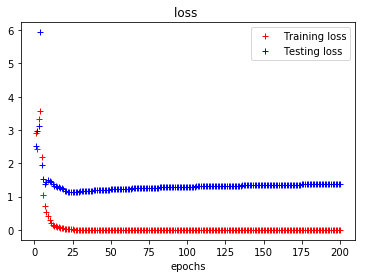

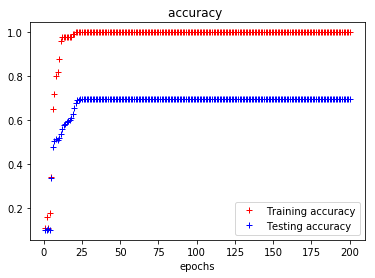

In [0]:
epochs=range(1,epoch+1)

loss_train = train_loss
metrics_train = train_acc
loss_test = test_loss
metrics_test = test_acc

print('Erreur de la base de données TEST',loss_and_metrics[0])
print('Taux de reconnaisance',loss_and_metrics[1])
plt.figure()
plt.title("loss ")
plt.plot(epochs,loss_train,'r+',label="Training loss")
plt.plot(epochs,loss_test,'b+',label="Testing loss")
plt.legend()
plt.xlabel("epochs")
plt.show()

plt.figure()
plt.title("accuracy ")
plt.plot(epochs,metrics_train,'r+',label="Training accuracy")
plt.plot(epochs,metrics_test,'b+',label="Testing accuracy")
plt.legend()
plt.xlabel("epochs")
plt.show()